In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding ='Unicode_escape' )
#to Avoid Encoding error
df.shape

(11251, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 966.9+ KB


In [4]:
#Drop Unrelated/Blank column
df.drop(['Status','unnamed1'],axis=1, inplace = True)

In [5]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [6]:
df.shape

(11251, 13)

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(11239, 13)

In [9]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

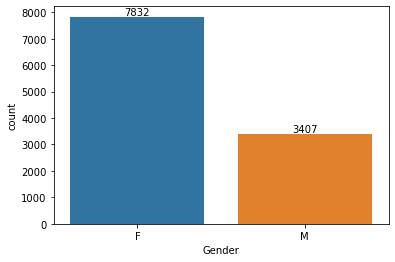

In [15]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

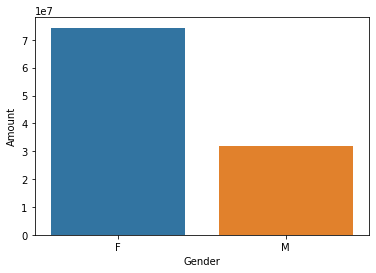

In [17]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

## Age

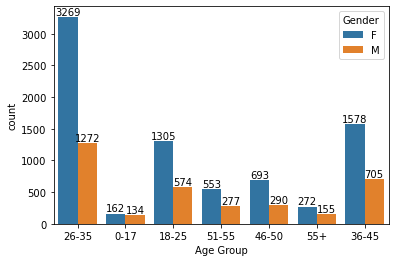

In [18]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

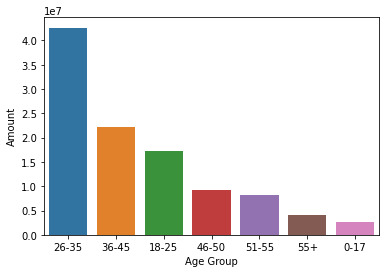

In [19]:
#total Amount vs Age Group 
Sales_Age = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group', y='Amount', data = Sales_Age)

From above graphs we can see that most of the  buyers are of age group between 26-35 years female

## State

<AxesSubplot:xlabel='State', ylabel='Orders'>

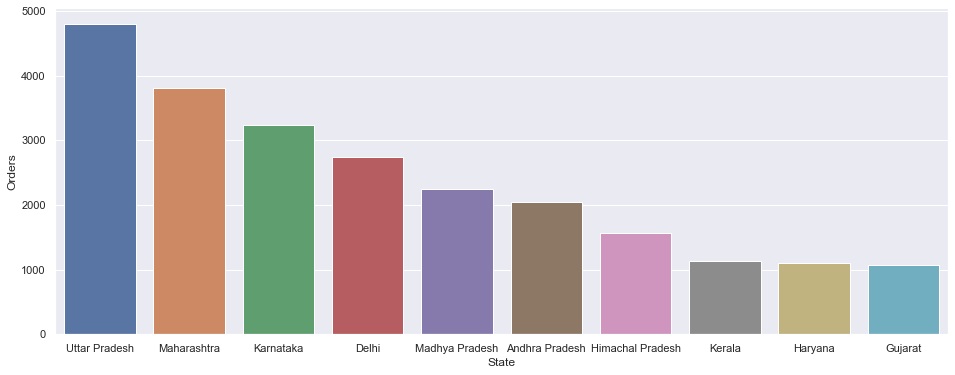

In [20]:
#total number of order from top 10 states

sales_state = df.groupby (['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data = sales_state, x = 'State',y = 'Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

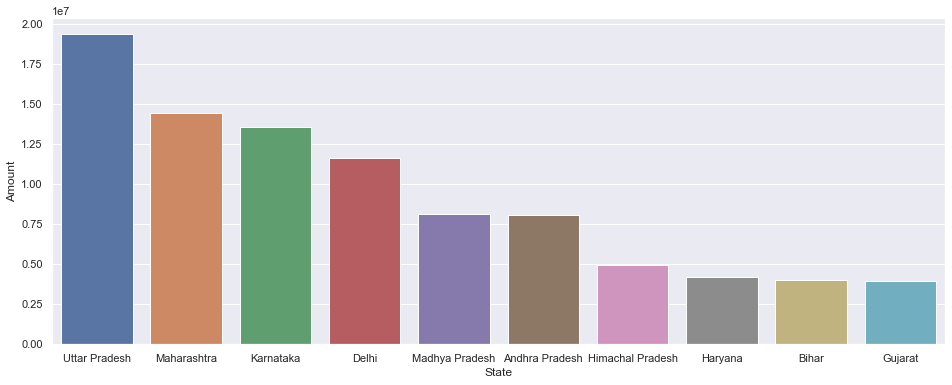

In [21]:
#total amount/Sales for top 10 states 

sales_state = df.groupby (['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data = sales_state, x = 'State',y = 'Amount')

from above graph we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharastra and Karnataka Respectively

## Marital Status

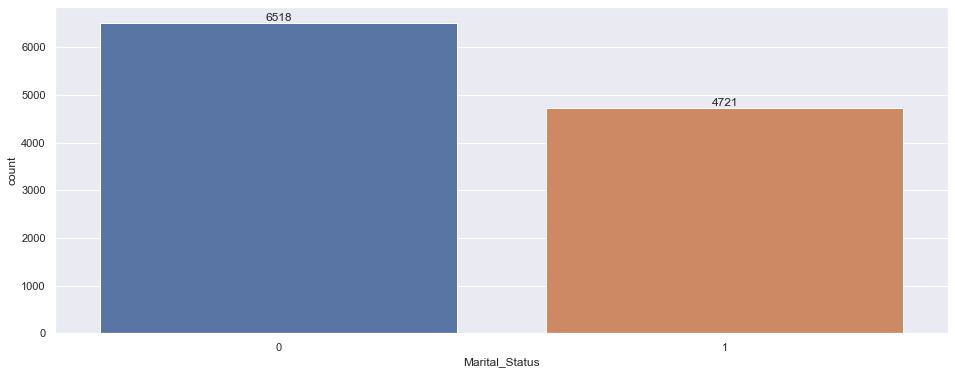

In [22]:
ax = sns.countplot(data = df , x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

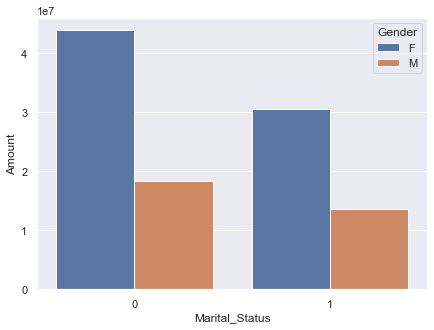

In [23]:
sales_gender = df.groupby(['Marital_Status','Gender'], as_index = False).sum().sort_values(by='Amount',ascending = False)

sns.barplot(data = sales_gender, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

from above graphs we can se that most of the buyers are married woman and they have high purchasing power 

## Occupation

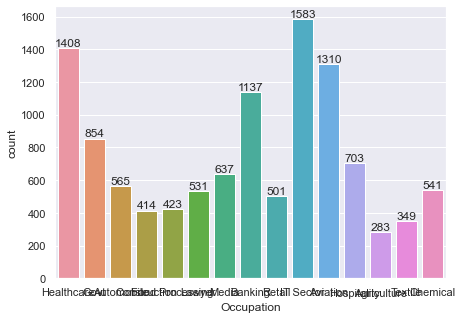

In [24]:
ax = sns.countplot(data = df, x = 'Occupation')

sns.set(rc={'figure.figsize':(20,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

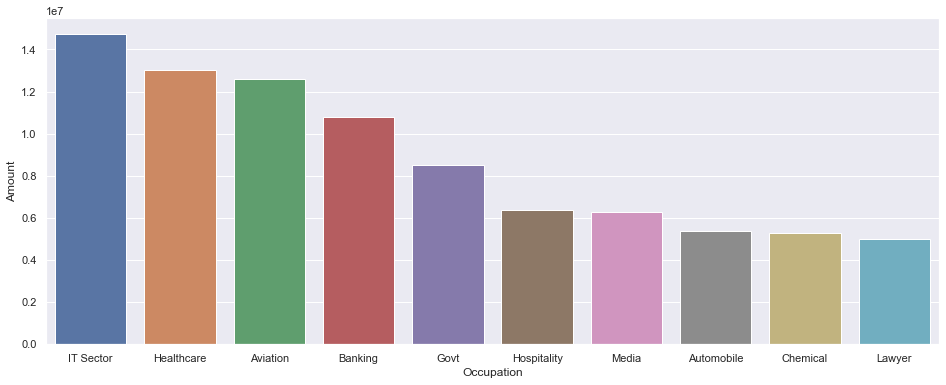

In [25]:
sales_state = df.groupby (['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data = sales_state, x = 'Occupation',y = 'Amount')

from above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

## Product Category

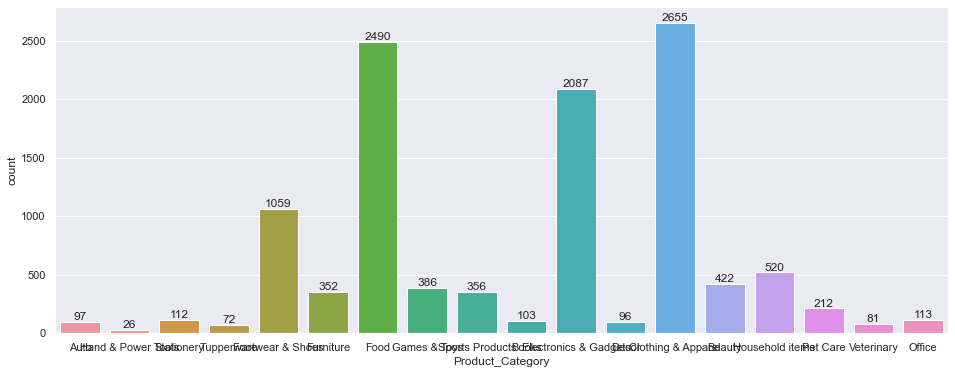

In [26]:
ax = sns.countplot(data = df , x = 'Product_Category')

sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

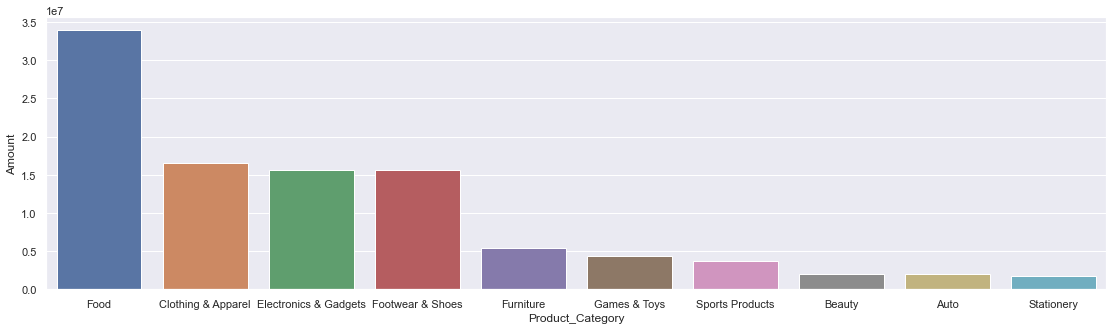

In [27]:
sales_state = df.groupby (['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y = 'Amount')

from above graphs we can that most of the sold products are food, clothing and electronic categort

<AxesSubplot:xlabel='Product_ID', ylabel='Amount'>

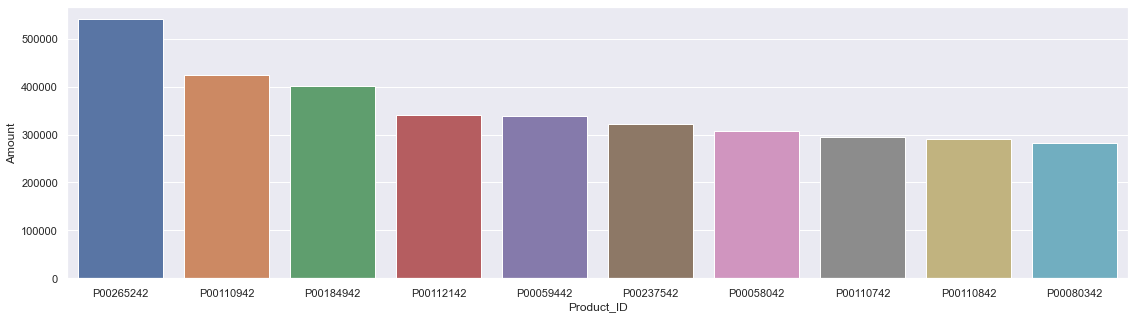

In [28]:
sales_state = df.groupby (['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(19,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y = 'Amount')

<AxesSubplot:xlabel='Product_ID'>

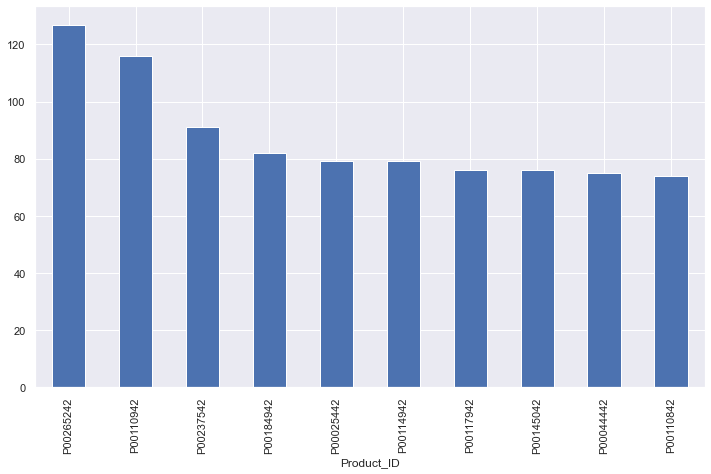

In [29]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

Married woman age group 25-35 years from up, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy Food, Clothing and Electornics Category

# Project Learnings
### » Performed dara cleaning and manipulation
### » Performed Exploratory data analysis (EDA) using pandas, matplotlib and seaborn libraries
### » Improved customer experience by identifying potential customers across differnt states, occupation, gender and age groups
### » Improved sales by identifying most selling product categories and products, which can help to plan inventory and hence meet the demand